In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dt=pd.read_csv('D:/pyLX/NYstockprices.csv')

In [57]:
# ma5: average of previous 5 closing price
# ma3: average of previous 30 closing price
dt['ma5']=dt['open'].rolling(5).mean()      # calculate the mean of the previous 5 closing price and put into ma5
dt['ma30']=dt['open'].rolling(30).mean()
dt.head(10)

,date,symbol,open,close,low,high,volume,ma5,ma30
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN,NaN
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,NaN,NaN
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,NaN,NaN
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,NaN,NaN
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,119.508000,NaN
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,117.924000,NaN
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,116.168001,NaN
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,115.594002,NaN
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,115.164001,NaN
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,114.494002,NaN


In [58]:
dt1=dt[(dt['date']>'2016-03-21')&(dt['date']<'2016-07-14')]

In [59]:
#dt1.symbol.unique()

In [60]:
dt2=dt1[dt1.symbol=='SLB']
#dt2.head()
dt2.describe()

,open,close,low,high,volume,ma5,ma30
count,79.000000,79.000000,79.000000,79.000000,7.900000e+01,79.000000,79.000000
mean,76.396456,76.546835,75.706709,77.265950,7.046023e+06,130.478835,87.956633
std,2.503718,2.542106,2.482330,2.557475,2.392144e+06,2.164337,1.261328
min,71.580002,72.010002,71.339996,72.660004,4.050100e+06,125.632002,84.060667
25%,74.239998,74.229999,73.569999,74.970001,5.429850e+06,129.183002,87.260500
50%,76.760002,76.849998,75.919998,77.599998,6.583900e+06,130.200001,88.016999
75%,78.534999,78.634998,77.849998,79.215000,8.134500e+06,132.149999,88.944833
max,80.879997,81.099998,80.160004,81.959999,2.146780e+07,135.311998,90.167333


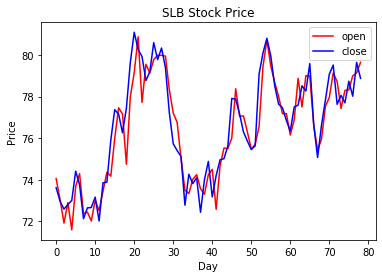

In [61]:
plt.plot(dt2.open.values,color='red',label='open')
plt.plot(dt2.close.values,color='blue',label='close')
plt.title('SLB Stock Price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(loc='best')

In [62]:
# Death Cross: ma5 < ma30
sr1=dt1['ma5']>dt1['ma30']
sr2=dt1['ma5']<=dt1['ma30']
dt1[(sr1&sr2.shift(1))]

,date,symbol,open,close,low,high,volume,ma5,ma30
73,2016-04-20 00:00:00,WLTW,121.099998,122.309998,121.019997,122.459999,658800.0,119.286000,118.462667
118,2016-06-23 00:00:00,WLTW,127.940002,127.650002,126.599998,127.940002,512300.0,126.550000,126.249667
130,2016-07-12 00:00:00,WLTW,125.889999,127.199997,125.370003,127.320000,844000.0,124.925999,124.887999
752338,2016-03-22,AAP,157.979996,158.190002,157.470001,159.270004,404200.0,64.127999,58.480333
752355,2016-03-22,AGN,273.609985,277.220001,271.790009,282.440002,3310800.0,104.877997,75.705999
...,...,...,...,...,...,...,...,...,...
791729,2016-07-13,VRSK,85.000000,84.709999,84.349998,85.000000,492000.0,81.478000,81.391000
791734,2016-07-13,WAT,151.440002,147.919998,147.220001,151.440002,271900.0,90.948001,82.173667
791744,2016-07-13,WRK,40.020000,39.610001,39.139999,40.090000,1193700.0,75.599999,74.332667
791751,2016-07-13,XL,33.119999,33.180000,32.849998,33.270000,1192600.0,73.846001,72.338334


In [63]:
death_cross=dt1[(sr1&sr2.shift(1))].index

In [64]:
# Golden Cross: ma5 > ma30
dt1[-(sr1|sr2.shift(1))]

,date,symbol,open,close,low,high,volume,ma5,ma30
63,2016-04-06 00:00:00,WLTW,114.089996,115.470001,113.730003,115.610001,2035300.0,117.402001,117.564666
113,2016-06-16 00:00:00,WLTW,123.339996,124.839996,122.750000,124.870003,404800.0,125.995997,126.021000
119,2016-06-24 00:00:00,WLTW,121.000000,117.010002,115.930000,121.250000,1638000.0,125.816000,126.135000
752335,2016-03-21 00:00:00,AIV,40.189999,40.259998,40.110001,40.529999,1000900.0,57.786000,59.397333
752353,2016-03-22,AET,111.209999,112.519997,111.070000,113.169998,1834300.0,58.874000,67.282333
...,...,...,...,...,...,...,...,...,...
791733,2016-07-13,VZ,55.580002,56.000000,55.369999,56.040001,11405600.0,77.660001,79.656334
791737,2016-07-13,WEC,63.970001,64.260002,63.810001,64.279999,1882400.0,80.920001,82.174667
791745,2016-07-13,WU,19.990000,19.889999,19.809999,20.020000,2562200.0,44.718000,73.934000
791752,2016-07-13,XLNX,47.639999,47.619999,47.470001,47.770000,1597700.0,68.368001,71.337000


In [65]:
golden_cross=dt1[-(sr1|sr2.shift(1))].index

In [66]:
# Suppose you have $10000 on Jan-1, 2016 planning to invest on stocks
# Decision: buy stocks when the day is Golden Cross; sell stocks when the day is Death Cross
fund=10000
money=fund
label1 = pd.Series(1,index=golden_cross)
lebel2 = pd.Series(0,index=death_cross)
label = label1.append(label2).sort_index()
for i in range(1,len(label)):
    p = dt1['open'][label.index[i]]
    if label.iloc[i]==1:
        buy = (money//(100*p))
        hold += buy*100
        money -= buy*100*p
    else:
        moeny += hold*p
        hold =0
p = dt1['open'][-1]
final = hold+p+money
print(final-fund)
    


NameError: name 'label2' is not defined